# Open Cluster H-R Diagrams

Figure 8.1 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Three-panel plot of H-R diagrams for open clusters, h Persei, Praesepe, and NGC188.

Data are from the Gaia DR2 Open Clusters data paper (Cantat-Gaudin et al. 2018 A&A 618, 93).
Distance moduli and extinctions adopted:
<ul>
 <li>h Per m-M = 11.8 E(B-V) = .532 (average from Currie et al. 2010)
 <li>Praesepe m-M = 6.35 E(B-V) = 0 (my paper; the reference has 0.027 if you want to tweak the file)
 <li>NGC 188 m-M = 11.49 E(B-V) = 0.085
</ul>

Ages are
<ul>
 <li>h Per: 13 Myr (Currie et al. 2010)
 <li>Praesepe: 700 Myr (Godoy Rivera et al. 2021)
 <li>NGC 188: 8 Gyr (Cantat-Gaudin et al. 2018)
</ul>

We adopted Gaia band extinction corrections the same as Godoy Rivera et al. 2021:
<ul>
 <li>A<sub>G</sub> = .85926 A<sub>V</sub>
 <li>A<sub>BP</sub> = 1.06794 A<sub>V</sub>
 <li>A<sub>RP</sub> = 0.65199 A<sub>V</sub>
</ul>
with R = A<sub>V</sub>/E(B-V)=3.26
 

In [9]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
from matplotlib.patches import Ellipse

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [10]:
plotFile = 'Fig8_1.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Gaia DR2 Open Clusters

Data are from the Gaia DR2 Open Clusters data paper (Cantat-Gaudin et al. 2018 A&A 618, 93).

In [11]:
clusterList = ['hPer','Praesepe','NGC188']
clusterName = ['h Persei\n13 Myr','Praesepe\n700 Myr','NGC 188\n8 Gyr']
clusterDir = 'OpenClusters'

MG = {}
color = {}
for cluster in clusterList:
    dataFile = f'{clusterDir}/{cluster}_GaiaDR2_CMD.csv'
    data = pd.read_csv(dataFile)
    MG[cluster] = np.array(data['MG0'])
    color[cluster] = np.array(data['BP-RP0'])


### Figure 8.1

Three-panel, side-by-side plot of the open cluster CMDs
 * Left: H Persei
 * Middle: Praesepe
 * Right: NGC188


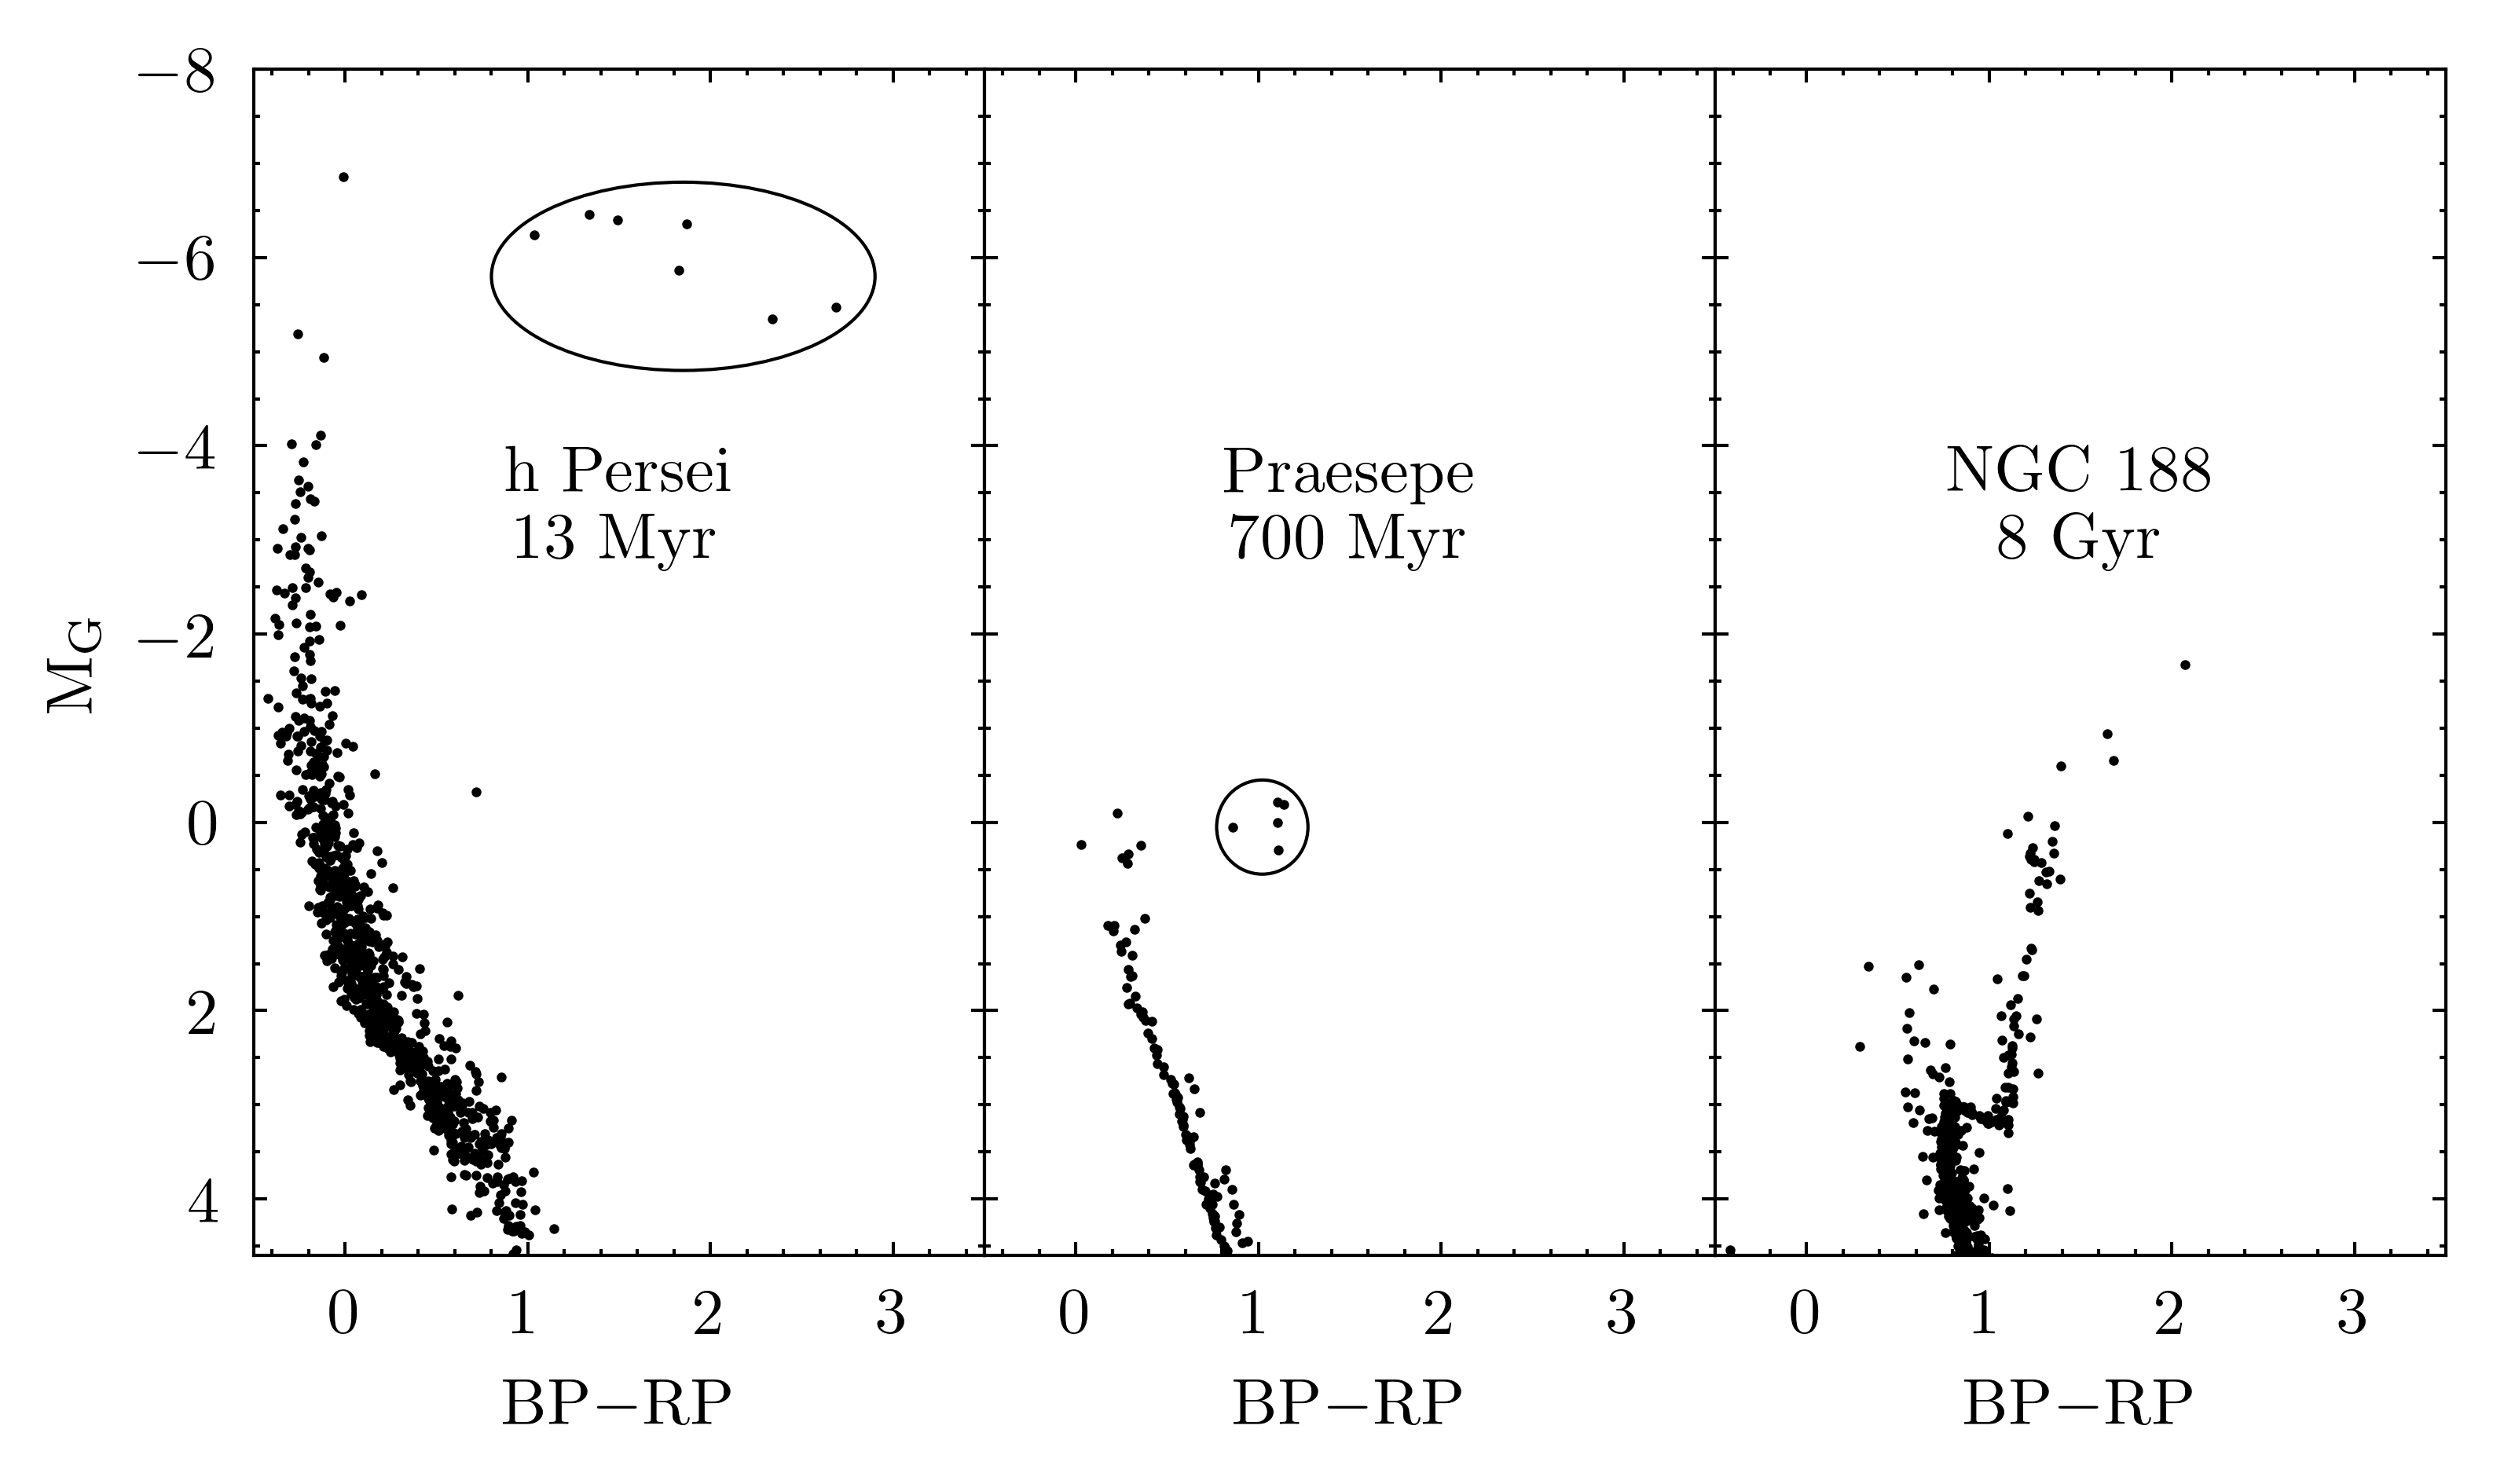

In [12]:
fig,ax = plt.subplots(1,3,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0, hspace=0)

# Axis Limits

minColor = -0.5
maxColor = 3.5
minM_G = 4.6
maxM_G = -8.0

for i in range(len(clusterList)):
    cluster = clusterList[i]
    ax[i].set_xlim(minColor,maxColor)
    ax[i].set_ylim(minM_G,maxM_G)
    ax[i].tick_params('both',length=2,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i].tick_params('both',length=1,width=lwidth,which='minor',direction='in',top='on',right='on')
    ax[i].xaxis.set_major_locator(MultipleLocator(1.0))
    ax[i].xaxis.set_minor_locator(MultipleLocator(0.2))
    ax[i].yaxis.set_major_locator(MultipleLocator(2.0))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[i].set_xlabel(r'BP$-$RP', fontsize=axisFontSize)
    if i > 0:
        ax[i].axes.yaxis.set_ticklabels([])
    else:
        ax[i].set_ylabel(r'M$_{\rm G}$',fontsize=axisFontSize)
    ax[i].plot(color[cluster],MG[cluster],'o',color='black',ms=1.5,mew=0,alpha=1,zorder=10)
    ax[i].text(1.5,-4,clusterName[i],va='top',ha='center',fontsize=axisFontSize)
    
    # ellipses around evolved stars in h Per and Praesepe
    
    if cluster=='hPer':
        ell = Ellipse((1.85,-5.8),2.1,2,fill=False,ls='-',lw=0.5)
        ax[i].add_artist(ell)
    elif cluster=='Praesepe':
        ell = Ellipse((1.02,0.05),0.5,1,fill=False,ls='-',lw=0.5)
        ax[i].add_artist(ell)       

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')